Case Study-Titan Insurance Company-

The Titan Insurance Company has just installed a new incentive payment scheme for its lift policy sales force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies, but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference.

Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during the month. For example, suppose salesperson X has, in the month, sold seven policies for which the sums assured are £1000, £2500, £3000, £5000, £10000, £35000. X's output for the month is the total of these sums assured, £61,500. Titan's new scheme is that the sales force receives low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company, but they are looking for sales increases which more than compensate. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months.

The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover.<br>

To test the effectiveness of the scheme, Titan have taken a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover). The outputs of the salespeople are shown in Table 1

 
<u>Questions</u>

1) Find the mean of old scheme and new scheme column. (5 points)<br>
2) Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)<br>
3) What conclusion does the test (p-value) lead to? (2.5 points)<br>
4) Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:<br>
5) The probability of a type 1 error? (2.5 points)<br>
6) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)<br>
7) Power of the test (5 points)

In [33]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, bartlett, wilcoxon, ttest_rel
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt

In [2]:
sales=pd.DataFrame(data=([[1,57,62],[2,103,122],[3,59,54],
                          [4,75,82],[5,84,84],[6,73,86],
                          [7,35,32],[8,110,104],[9,44,38],
                          [10,82,107],[11,67,84],[12,64,85],
                          [13,78,99],[14,53,39],[15,41,34],
                          [16,39,58],[17,80,73],[18,87,53],
                          [19,73,66],[20,65,78],[21,28,41],
                          [22,62,71],[23,49,38],[24,84,95],
                          [25,63,81],[26,77,58],[27,67,75],
                          [28,101,94],[29,91,100],[30,50,68]]),
                   columns=('SALESPERSON','Old Scheme (in thousands)','New Scheme (in thousands)'))
sales.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


In [3]:
sales['old_sales']=sales['Old Scheme (in thousands)']*1000
sales['new_sales']=sales['New Scheme (in thousands)']*1000
sales.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands),old_sales,new_sales
0,1,57,62,57000,62000
1,2,103,122,103000,122000
2,3,59,54,59000,54000
3,4,75,82,75000,82000
4,5,84,84,84000,84000


### Find the mean of old scheme and new scheme column

In [4]:
print('Mean of Old Scheme is:',sales['old_sales'].mean())
print('Mean of New Scheme is:',sales['new_sales'].mean())

Mean of Old Scheme is: 68033.33333333333
Mean of New Scheme is: 72033.33333333333


we can see that there is not outliers for the both the dataset


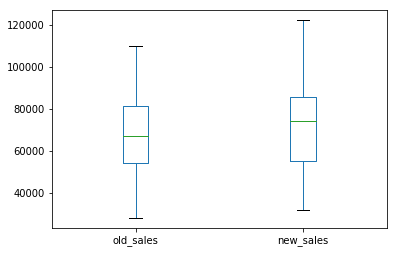

In [49]:
sales[['old_sales','new_sales']].plot(kind='box')
plt.show
print('we can see that there is not outliers for the both the dataset')

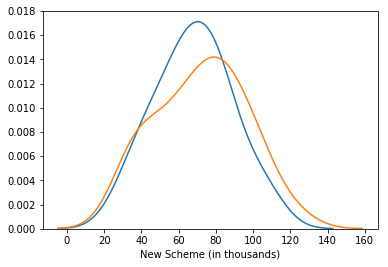

In [82]:
sns.distplot(sales['Old Scheme (in thousands)'],hist= False)
sns.distplot(sales['New Scheme (in thousands)'],hist= False)

In [5]:
Old_sales = sales['old_sales'].values
New_sales = sales['new_sales'].values

## Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs?

In [83]:
# checking the Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
print(shapiro(Old_sales))
print(shapiro(New_sales))
print('The test found that both the data is normal,that means failing to reject the null hypothesis at a 95% Confidence level.')

(0.9885101914405823, 0.9813658595085144)
(0.9687567353248596, 0.5057420134544373)
The test found that both the data is normal,that means failing to reject the null hypothesis at a 95% Confidence level.


In [7]:
#checking equality of variance between groups
# Null Hypothesis: Variances are equal
levene(Old_sales,New_sales)

LeveneResult(statistic=1.063061539437245, pvalue=0.30679836081811235)

## Observation:

### From datasets

1) The level of significance (Alpha ) = 0.05<br>
2) The Dataset belongs to Two sample with paired sample test<br>
3) As the population standard deviation is unknow, we use Tstat test<br>
4) Degree of freedom for paired sample is : (30-1) = 29<br>
### From test for Normality, Var:
1) Observations in each sample are independent and identically distributed.<br>
2) Observations in each sample are normally distributed.<br>
3) Observations in each sample have the same variance.<br>
4) Two sample with paired sample test

With above obervations, have selected Parametric:1sampletest or ttest_rel<br>

In [106]:
# Calculate the critical Values
cv = t.ppf(1.0 - alpha, (30-1))
print('The critical_values is against the degree of freedom of 29 and confidence interval of 95% (alpha=0.05):\n',-cv,cv)

The critical_values is against the degree of freedom of 29 and confidence interval of 95% (alpha=0.05):
 -1.6991270265334972 1.6991270265334972


### Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs?

For this the hypothesis considered as below:

- Null Hypotheses H0, H diff <= 0
- Alternate hypothesis Hal, H diff > 0

In [143]:
#t-stats and P Value
t_statistic, p_value = ttest_1samp(New_sales - Old_sales,0 )
print('For one-sided t test, the P-value is divided by 2:')
print('t_statistic:',t_statistic.round(3),'\np_value:',(p_value.round(3))/2)
print('\nFrom above, we can see the that t-statistic(',t_statistic.round(3),') is lesser than critival value(',cv.round(3),')and p_value is',(p_value/2).round(3),'is greater than 0.25')

For one-sided t test, the P-value is divided by 2:
t_statistic: 1.556 
p_value: 0.0655

From above, we can see the that t-statistic( 1.556 ) is lesser than critival value( 1.699 )and p_value is 0.065 is greater than 0.25


## What conclusion does the test (p-value) lead to?

#### Thus, we can conclude that the "New Scheme" has not increased significantly when compaired to "Old Scheme", though there is a increase in the mean of the New Scheme, but there is no significant increase from stat perspective.<brb>
#### At the same time, if we look for rejecting the Null Hypothesis, then from the test we can say that the sample size is not sufficient to reject the null hypothesis

## Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is
The probability of a type 1 error?

In [189]:
print('Probalbility for Typer I error: When the null hypothesis is true and still Ho is rejected, this is make a type I error. The probability of making a type I error is α, which is the level of significance that we have set for the hypothesis test. Here we have set α of 0.05 indicates that willing to accept a 5% chance Type I erro when rejecting the null hypothesis')

Probalbility for Typer I error: When the null hypothesis is true and still Ho is rejected, this is make a type I error. The probability of making a type I error is α, which is the level of significance that we have set for the hypothesis test. Here we have set α of 0.05 indicates that willing to accept a 5% chance Type I erro when rejecting the null hypothesis


### What is the p- value of the hypothesis test if we test for a difference of $5000?

In [177]:
t_statistic, p_value = ttest_1samp(New_sales - Old_sales,5000 )
print('P-Value for the case of diff of $5000 is:',(p_value.round(3))/2)

P-Value for the case of diff of $5000 is: 0.35


### Power of the test

In [185]:
t.stat=(np.mean(New_sales) - np.mean(Old_sales)) / (np.sqrt((((30-1)*np.var(Old_sales)) + ((30-1)*np.var(New_sales))) / (30+30-2)))
print('t.stat:',t.stat)
power_sample=ttest_power(0.182, nobs=30, alpha=0.05, alternative='two-sided')
print('power is:',power_sample)

t.stat: 0.18217632044690085
power is: 0.1613876736391959
